In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\M2DS\S3\Data_Viz\365\project-files-music-genre-classification-with-pca\music_dataset_mod.csv')  

# Make a copy for analysis
music_data = data.copy()


In [3]:
# Display the first few rows of the dataset
music_data.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [4]:
# Display dataset info
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
# Check for null or missing values
music_data.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [6]:
# Find unique genres and their count
unique_genres = music_data['Genre'].unique()
print(f"Unique Genres: {unique_genres}")
print(f"Number of Unique Genres: {len(unique_genres)}")


Unique Genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']
Number of Unique Genres: 6


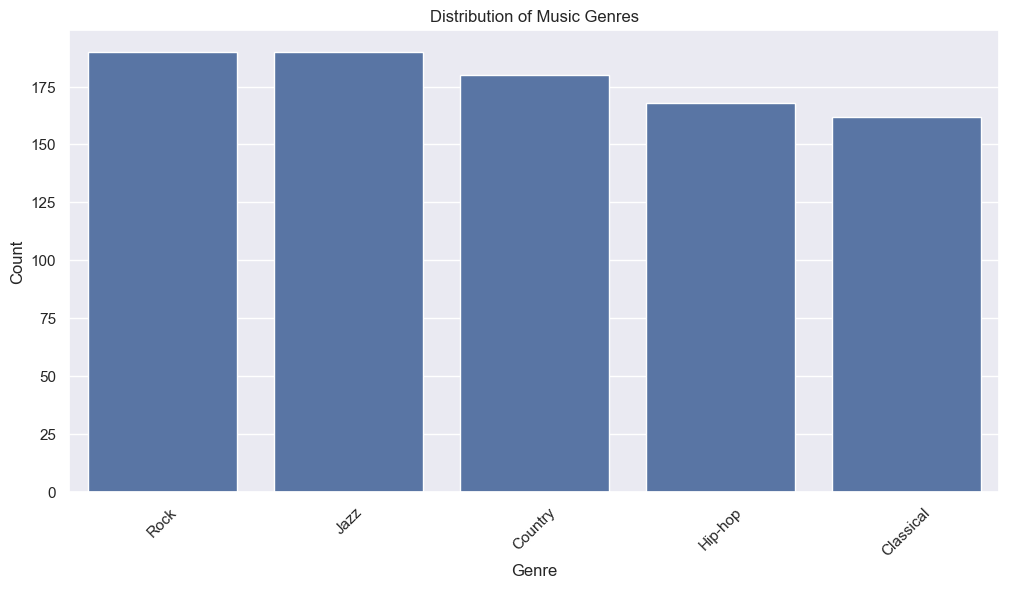

In [7]:
# Visualize the distribution of genres
plt.figure(figsize=(12, 6))
sns.countplot(data=music_data, x='Genre', order=music_data['Genre'].value_counts().index)
plt.title("Distribution of Music Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Display genre counts
genre_counts = music_data['Genre'].value_counts()
genre_counts

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

In [9]:
# Check if the dataset is balanced
max_genre = genre_counts.max()
min_genre = genre_counts.min()
print(f"Most common genre count: {max_genre}")
print(f"Least common genre count: {min_genre}")

Most common genre count: 190
Least common genre count: 162


## Data Insights

### Dataset Overview
- The dataset has 13 columns and 1000 entries.
- The `Genre` column has 110 missing values.
- All other features are complete (non-null).

### Unique Genres
- There are 6 unique genres: 'Country', 'Classical', 'Rock', 'Hip-hop', 'Jazz', and `NaN` (missing).
- These genres indicate a multi-class classification problem.

### Genre Distribution
- The counts for each genre are:
  - Rock: 190
  - Jazz: 190
  - Country: 180
  - Hip-hop: 168
  - Classical: 162
- The most common genre (Rock and Jazz) has 190 tracks, and the least common genre (Classical) has 162 tracks.

### Balance Assessment
- The genre counts are relatively close, indicating that the dataset is moderately balanced.
- There isn’t a drastic disparity, which is advantageous for training a classification model as it reduces the risk of bias.


C:\Users\BILAL\AppData\Local\Temp\ipykernel_13396\318217102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


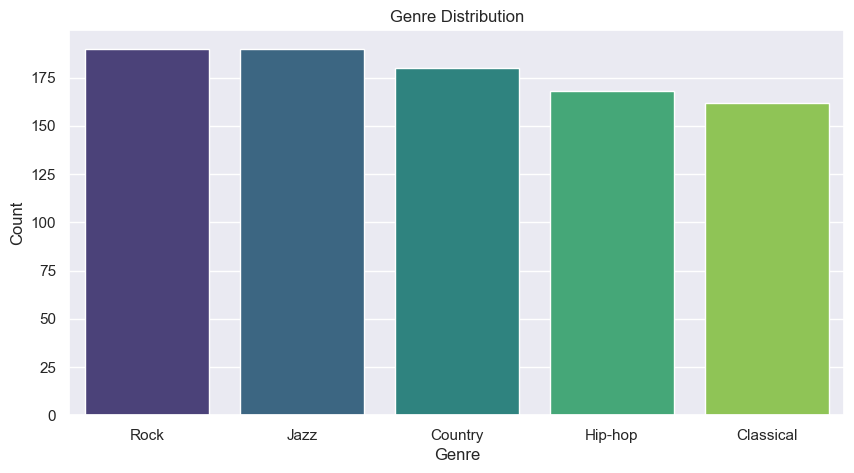

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [12]:
## Prepare the DataFrame
# Drop rows with missing values in 'Genre'
cleaned_data = music_data.dropna(subset=['Genre']).copy()

In [13]:
# Encode the 'Genre' column into numerical values
label_encoder = LabelEncoder()
cleaned_data['Genre'] = label_encoder.fit_transform(cleaned_data['Genre'])

In [34]:
# Afficher la correspondance entre les genres originaux et les valeurs encodées
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Correspondance entre les genres et leurs valeurs numériques :")
genre_mapping

Correspondance entre les genres et leurs valeurs numériques :


{'Classical': np.int64(0),
 'Country': np.int64(1),
 'Hip-hop': np.int64(2),
 'Jazz': np.int64(3),
 'Rock': np.int64(4)}

In [14]:
cleaned_data.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


In [15]:
# Create the Correlation Matrix
correlation_matrix = cleaned_data.corr()

In [16]:
correlation_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


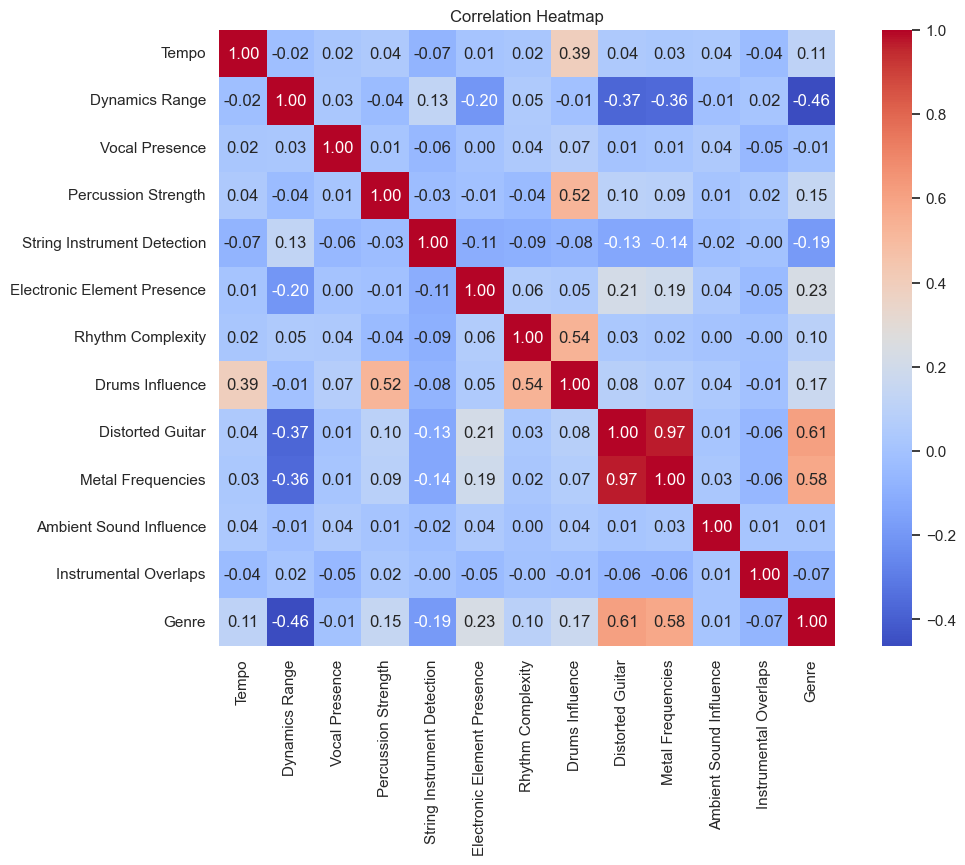

In [17]:
# Visualize the Correlation Matrix as a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.title("Correlation Heatmap")
plt.show()


## Insights from the Correlation Matrix

Here’s a summary of notable observations and insights derived from the correlation matrix:

### Strong Positive Correlations with Genre:
- **Distorted Guitar**: 0.607  
- **Metal Frequencies**: 0.582  
- **Electronic Element Presence**: 0.233  
  These features are likely key indicators of certain genres (e.g., Rock or Metal).

### Negative Correlations with Genre:
- **Dynamics Range**: -0.463  
- **String Instrument Detection**: -0.185  
  These might be inversely associated with genres that rely on electronic or distorted elements.

### High Inter-feature Correlations:
- **Distorted Guitar** and **Metal Frequencies**: 0.966  
- **Drums Influence** and **Rhythm Complexity**: 0.537  
- **Drums Influence** and **Percussion Strength**: 0.525  
  Such strong correlations could indicate feature redundancy, potentially requiring dimensionality reduction or feature selection.

### Low Correlations with Genre:
- **Ambient Sound Influence**: 0.015  
- **Vocal Presence**: -0.006  
  These features may not contribute significantly to predicting the `Genre` and could be deprioritized during modeling.


In [18]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(music_data.drop(columns='Genre'))

In [19]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [20]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [21]:
# Determine the number of components for 80% variance
components_80 = np.argmax(cumulative_variance >= 0.80) + 1

In [22]:
# Print results
print(f"Number of components needed for 80% variance: {components_80}")
print("Explained Variance Ratio:")
print(explained_variance)

Number of components needed for 80% variance: 8
Explained Variance Ratio:
[0.20124871 0.15042515 0.09266609 0.08680459 0.08516604 0.08178983
 0.07900191 0.07737509 0.06854972 0.06176162 0.01235041 0.00286083]


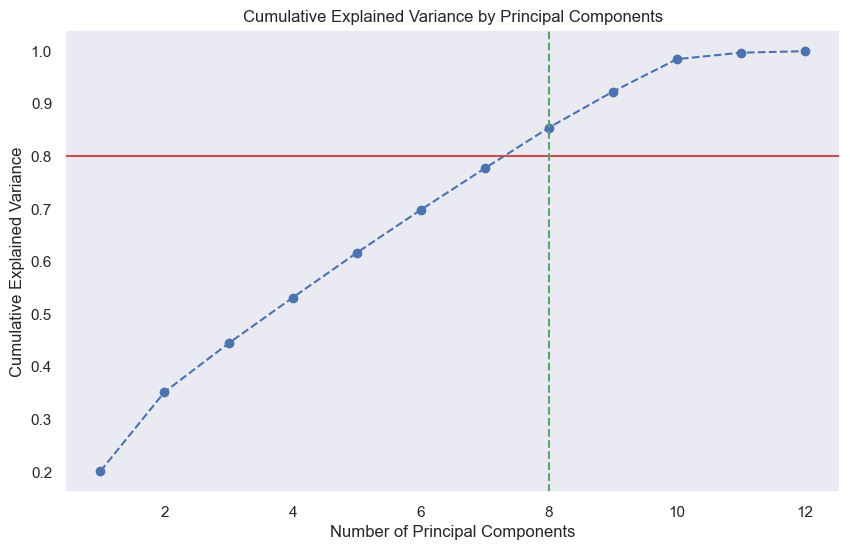

In [23]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=components_80, color='g', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

## PCA for Dimensionality Reduction

### Results:
- **Number of components needed for 80% variance**: 8  
  This indicates that using 8 principal components is sufficient to retain 80% of the dataset's variability, significantly reducing the dimensionality from 12 to 8 features.

- **Explained Variance Ratio**:
  - PC1: 20.12%
  - PC2: 15.04%
  - PC3: 9.27%
  - PC4: 8.68%
  - PC5: 8.52%
  - PC6: 8.18%
  - PC7: 7.90%
  - PC8: 7.74%
  - Remaining PCs collectively explain less than 20% of the variance.

### Insights:
- The first two components (PC1 and PC2) together explain **35.16%** of the variance.
- Each additional component adds diminishing returns to the explained variance.
- By selecting 8 components, the dataset's dimensionality is reduced by one-third while preserving most of the information (80% variance).

### Visualization:
- The cumulative explained variance plot highlights the "elbow point," which occurs at the 8th component, aligning with the 80% threshold.


In [24]:
# Define features and target
features = cleaned_data.drop(columns=['Genre'])  # All columns except the target
target = cleaned_data['Genre']  # Target column

In [25]:
# Split original data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42)

In [26]:
# Step 1: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Use 'features' from earlier

# Step 2: Apply PCA
pca = PCA(n_components=8)  # Use the number of components for 80% variance
X_pca = pca.fit_transform(scaled_features)

# Step 3: Split PCA-transformed data
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca, target, test_size=0.3, random_state=42)

In [27]:
# Train Logistic Regression on original data
logreg_orig = LogisticRegression(max_iter=10000, random_state=42)
logreg_orig.fit(X_train_orig, y_train)
y_pred_orig = logreg_orig.predict(X_test_orig)

In [28]:
# Evaluate performance on original data
accuracy_orig = accuracy_score(y_test, y_pred_orig)
report_orig = classification_report(y_test, y_pred_orig)
print("Logistic Regression on Original Data:")
print(f"Accuracy: {accuracy_orig:.2f}")
print(report_orig)

Logistic Regression on Original Data:
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.34      0.27      0.30        52
           2       0.44      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.50      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [29]:
# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)

In [30]:
# Evaluate performance on PCA-transformed data
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)
print("\nLogistic Regression on PCA-Transformed Data:")
print(f"Accuracy: {accuracy_pca:.2f}")
print(report_pca)


Logistic Regression on PCA-Transformed Data:
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



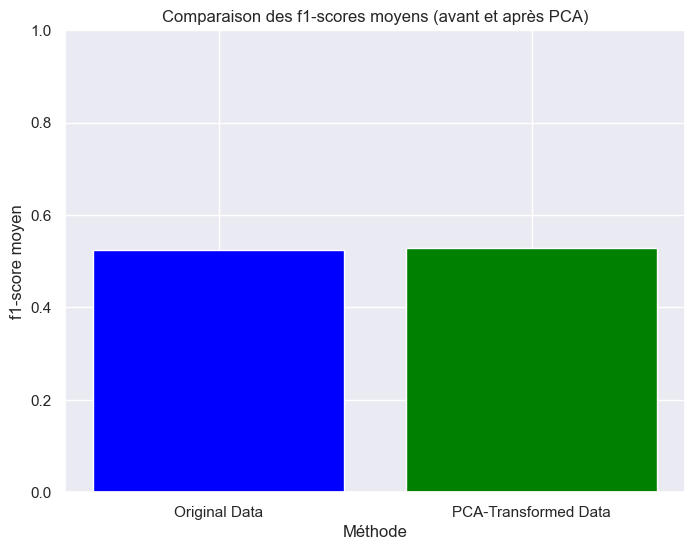

In [31]:

# Calculer les f1-scores pour chaque classe
f1_scores_orig = classification_report(y_test, y_pred_orig, output_dict=True)['macro avg']['f1-score']
f1_scores_pca = classification_report(y_test, y_pred_pca, output_dict=True)['macro avg']['f1-score']

# Création des barres
classes = ['Original Data', 'PCA-Transformed Data']
f1_scores = [f1_scores_orig, f1_scores_pca]

# Tracer le graphique
plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores, color=['blue', 'green'])
plt.title('Comparaison des f1-scores moyens (avant et après PCA)')
plt.ylabel('f1-score moyen')
plt.xlabel('Méthode')
plt.ylim(0, 1)  # Limiter l'axe des y de 0 à 1
plt.show()


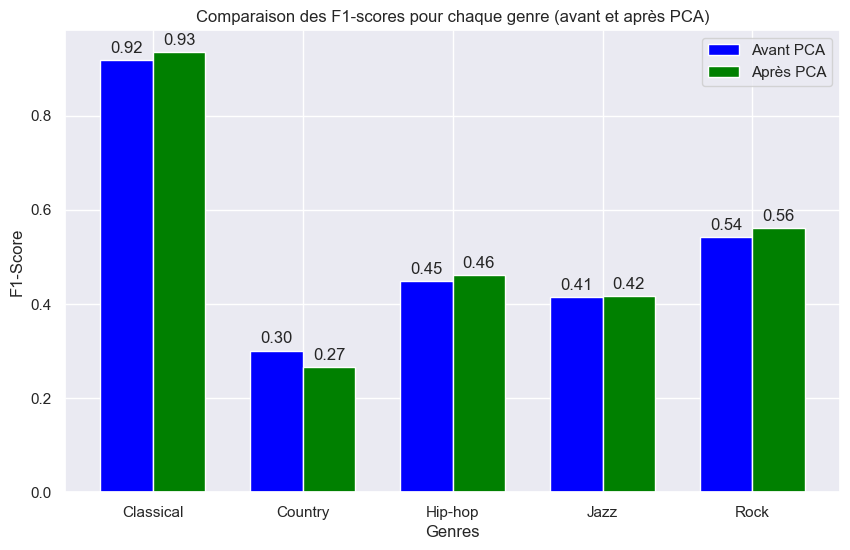

In [35]:

# Extraire les f1-scores pour chaque classe
report_orig = classification_report(y_test, y_pred_orig, output_dict=True)
report_pca = classification_report(y_test, y_pred_pca, output_dict=True)

# Récupérer les f1-scores pour chaque classe (de 0 à 4, selon les classes)
f1_scores_orig = [report_orig[str(i)]['f1-score'] for i in range(5)]
f1_scores_pca = [report_pca[str(i)]['f1-score'] for i in range(5)]

# Correspondance entre les genres et leurs valeurs numériques
genre_mapping = {0: 'Classical', 1: 'Country', 2: 'Hip-hop', 3: 'Jazz', 4: 'Rock'}

# Création du graphique
x = np.arange(len(genre_mapping))  # L'index des genres
width = 0.35  # Largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))

# Barres avant PCA
bars1 = ax.bar(x - width/2, f1_scores_orig, width, label='Avant PCA', color='blue')

# Barres après PCA
bars2 = ax.bar(x + width/2, f1_scores_pca, width, label='Après PCA', color='green')

# Ajouter des labels et des titres
ax.set_xlabel('Genres')
ax.set_ylabel('F1-Score')
ax.set_title('Comparaison des F1-scores pour chaque genre (avant et après PCA)')
ax.set_xticks(x)
ax.set_xticklabels([genre_mapping[i] for i in range(5)])
ax.legend()

# Afficher les valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Ajouter les labels sur les barres
add_labels(bars1)
add_labels(bars2)

plt.show()


## Insights from Logistic Regression Results

### Logistic Regression on Original Data
**Accuracy**: 53%  
**Observations**:  
- High precision and recall for Class 0 (likely an overrepresented or distinct class).  
- Lower precision and recall for other classes, especially Class 1.  
- Weighted average f1-score reflects the imbalanced performance across classes.  

### Logistic Regression on PCA-Transformed Data
**Accuracy**: 54%  
**Observations**:  
- A slight improvement in accuracy compared to the original dataset.  
- Precision and recall remain skewed toward Class 0.  
- Moderate improvement in the f1-score for Classes 2, 3, and 4.  

### Key Takeaways
**Impact of PCA**:  
- The PCA-transformed features resulted in a slight improvement in accuracy, suggesting that dimensionality reduction retained relevant information while discarding noise or redundant features.  
- However, the imbalance in class performance persists.  

**Performance Across Classes**:  
- Both models struggled with Classes 1 and 3, indicating these genres may overlap significantly in feature space or lack distinctive patterns.  
- The precision and recall for Class 0 (likely a well-defined genre) remained consistently high.  
